In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv("./Social_Network_Ads.csv")
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
X = dataset.iloc[:, :-1]  # 選取除最後一列以外的所有列
y = dataset.iloc[:, -1].to_frame() # 選取最後一列作為y
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


## Splitting the dataset

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 2), (80, 2), (320, 1), (80, 1))

In [5]:
y_test.head()

,Purchased
27,1
247,1
295,0
13,0
53,0


## Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# 針對input data(X)正規化
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pd.DataFrame(X_train)

,0,1
0,-0.962109,0.366093
1,-0.579537,2.277563
2,-0.005679,0.250247
3,-0.675180,-0.097293
4,0.281250,-0.560680
...,...,...
315,-0.483894,-1.255759
316,-1.153396,-1.139913
317,0.759466,0.481940
318,0.089964,0.221285


## Training the Kernel SVM model 

-  核函數 (Kernel Function)
   -  核函數是一種數學函數，用於將原始數據從低維空間映射到高維空間，使得數據在高維空間中可以被線性分隔。
   - SVM 本質上是一個線性分類器，但通過核函數，SVM 可以處理非線性分類問題。
   - RBF 是 SVM 中最常用的核函數

In [7]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

c:\Users\33313\.conda\envs\openai\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

## Predicting a new result

In [8]:
sample = [[30,87000]]
classifier.predict(
    sc.transform(sample)
    )

c:\Users\33313\.conda\envs\openai\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

## Predicting the Test set results

In [9]:
y_pred = classifier.predict(X_test)
print(type(y_pred)) # <class 'numpy.ndarray'>
print(type(y_test)) # <class 'pandas.core.frame.DataFrame'>

# 確保 y_pred 和 y_test 是 NumPy 陣列
# y_pred_numpy = y_pred.to_numpy().flatten()  # 從 DataFrame 提取為 NumPy 陣列並展平
y_test_numpy = y_test.to_numpy().flatten()  # 將 y_test 也轉換為 NumPy 陣列並展平

# 合併成 DataFrame
result_df = pd.DataFrame({
    "y_pred": y_pred,  # 一維的預測值
    "y_test": y_test_numpy   # 一維的真實值
})

# 顯示結果
result_df.head()

<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


,y_pred,y_test
0,1,1
1,1,1
2,0,0
3,0,0
4,0,0


## Confusion Matrix

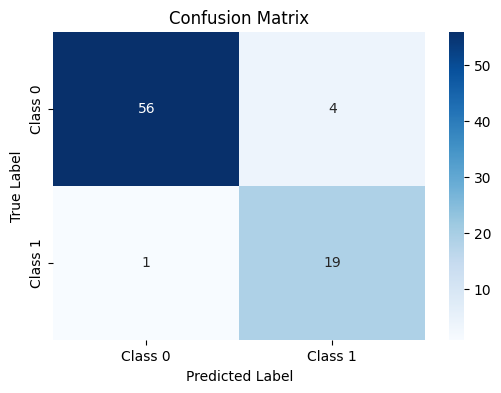

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 計算混淆矩陣
cm = confusion_matrix(y_test, y_pred)

# 繪製熱圖
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()